In [13]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
#Load Dataset
df1 = pd.read_csv('./mtcars.csv')
df1.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [15]:
#Dataset Attributes
df1 = df1.drop('model',axis=1)
df1.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [16]:
#Create Standard Model

#Define x and y variable
x = df1.drop('mpg',axis=1).values
y = df1['mpg'].values

#Train dataset using 20% test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

x_2 = sc.fit_transform(x)

In [17]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lm=lin_reg.fit(x_train2, y_train)

#Create prediction
ypred=lm.predict(x_test2)

#Calculate MAE, MSE and RMSE
from sklearn import metrics  
print('\nLinear Regression - Original Model')
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, ypred)))  
print('\nMAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, ypred)))  
print('MSE: {:0.2f}'.format(metrics.mean_squared_error(y_test, ypred)))  
print('RSME: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, ypred))))  


Linear Regression - Original Model

R2: 0.47

MAE: 2.96
MSE: 14.00
RSME: 3.74


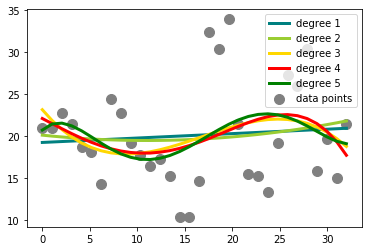

In [18]:
#Determine the Polynomial Size

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Plot of y variable
x_plot = np.linspace(0,len(y), len(y))#returns evenly spaced numbers array 
plt.scatter(x_plot, y, color='grey', s=100, marker='o', label="data points")
colors = ['teal', 'yellowgreen', 'gold', 'red','green','violet','grey']
x_plot = x_plot.reshape(-1,1)

#Plot Polynomial Model
for count, degree in enumerate([1, 2, 3, 4, 5]):
  model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
  model.fit(x_plot, y)
  y_plot = model.predict(x_plot)
  plt.plot(x_plot, y_plot, color=colors[count], linewidth=3,
           label="degree %d" % degree)
plt.legend(loc='upper right')
plt.show()


In [30]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
degrees = np.arange(1, 5)

#Create Pipeline

pipeline =[]

pipe_lm = Pipeline([('scl', StandardScaler()),
                       ('polynomial', PolynomialFeatures()),
                       ('clf', LinearRegression())])
pipeline.insert(0,pipe_lm)


# Set grid search params 

modelpara =[]

param_gridpoly = {'polynomial__degree': degrees,
             'clf__fit_intercept':[True,False],
              'clf__normalize':[True,False],
              'clf__copy_X':[True, False]}
modelpara.insert(0,param_gridpoly)

Model Evaluation - RMSE Score
LinearRegression 17.65




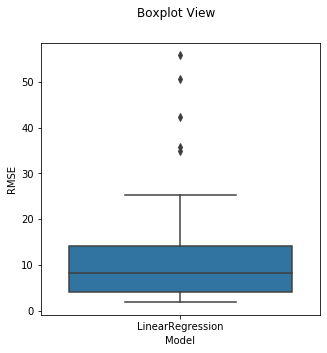

In [31]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('LinearRegression',pipe_lm))
  
#Model Evaluation
results =[]
names=[]
scoring ='neg_mean_squared_error'
print('Model Evaluation - RMSE Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(np.sqrt(-cv_results))
    names.append(name)
    print('{} {:.2f}'.format(name,np.sqrt(-cv_results.mean())))
print('\n')

#Boxpot View
fig = plt.figure(figsize=(5,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()

In [32]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, n_jobs=-1, cv=cv2,scoring='neg_mean_squared_error')
    gs_clf = gs_clf.fit(x_train, y_train)
    model = gs_clf.best_estimator_
    
    #Nested CV
    scoresNested = cross_val_score(gs_clf, x_2, y, 
                             scoring='neg_mean_squared_error', cv=5,
                             n_jobs= -1)    
      
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
   
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    print('\nBest Parameters:',bestpara)
    
    #Test data accuracy of model with best params    
    print('\nIntercept: {:.2f}'.format(float(gs_clf.best_estimator_.named_steps['clf'].intercept_)))
    print('\nModel coefficients: ')   
    for name, score in zip(list(df1.drop('mpg',axis=1)),
                            gs_clf.best_estimator_.named_steps['clf'].coef_):
        print(name, round(score,2))     
    
    #Print R2
    print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test,y_pred)))
    
    #Print MSE and RMSE
    print('\nNestedCV MSE:  {:0.2f}'.format(np.mean(-scoresNested)))
    print('NestedCV RMSE:  {:0.2f}'.format(np.sqrt(np.mean(-scoresNested))))  

In [33]:
#Run Models
for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Best Parameters: {'clf__copy_X': True, 'clf__fit_intercept': True, 'clf__normalize': True, 'polynomial__degree': 1}

Intercept: 19.87

Model coefficients: 
cyl 0.0
disp 1.94
hp 1.08
drat -0.31
wt 1.32
qsec -2.46
vs 1.46
am -0.07
gear 0.89
carb 2.6

R2: 0.30

NestedCV MSE:  16.17
NestedCV RMSE:  4.02


In [24]:
# First you need to install pygam using pip install pygam at the Anaconda prompt

#GAM Models
from pygam import LinearGAM

#Fit a model with the default parameters
gam = LinearGAM().fit(x_train2,y_train)

#Create Prediction
gam_pred = gam.predict(x_test2)

#Calculate MAE, MSE and RMSE
from sklearn import metrics  
print('\nGAM Model')
print('\nMSE: {:0.2f}'.format(metrics.mean_squared_error(y_test, gam_pred)))  
print('RSME: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, gam_pred))))  


GAM Model

MSE: 56.44
RSME: 7.51


LinearRegression

Permutation Importance




Weight,Feature
8.3042 ± 13.4163,hp
4.5236 ± 8.0609,qsec
2.1229 ± 2.5487,gear
1.6516 ± 2.5689,cyl
1.1533 ± 1.7036,am
0.9620 ± 2.5504,wt
0.6900 ± 2.8531,carb
0.1615 ± 0.8089,vs
0.1114 ± 2.2824,drat
-0.2428 ± 1.3682,disp


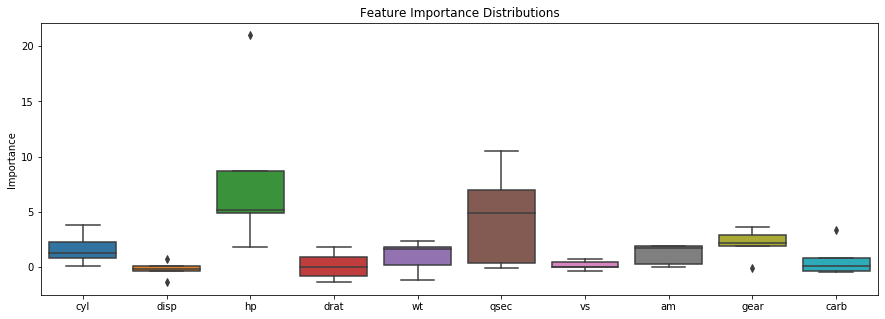

In [25]:
#Feature Importance
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display

for name, model in models:
    print(name)
    perm=PermutationImportance(model.fit(x_train2,y_train),random_state=100).fit(x_test2,y_test)
    features=df1.drop('mpg',axis=1).columns
    print('\nPermutation Importance')
    print('\n')
    df=eli5.show_weights(perm,feature_names=df1.drop('mpg',axis=1).columns.tolist())
    display(df)
    df2= pd.DataFrame(data=perm.results_,columns=features)
    fig = plt.figure(figsize=(15,5))
    sns.boxplot(data=df2).set(title='Feature Importance Distributions',
                             ylabel='Importance')
    plt.show()